## BIOINFORMATICS THESIS: MULTIMODAL NEURAL NETWORK

# CELL LINE: A549
# EMBRACENET

da fare 
- sistema selezione augmentation in embracenet
- crea grafici AUPRC reti

In [1]:
import pandas as pd 
import numpy as np
import os

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict, OrderedDict
import pickle

import sqlite3
from sqlalchemy import create_engine

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
#!rm SA_optuna_tuning.db

In [3]:
# create a database to store optuna studies with sqlite backendù
#engine = create_engine('sqlite:///BIOINF_optuna_tuning.db')

In [4]:
from BIOINF_tesi.data_pipe import CELL_LINES, TASKS

In [5]:
cell_line = CELL_LINES[0]
cell_line

'A549'

---

In [ ]:
from BIOINF_tesi.data_pipe import Build_DataLoader_Pipeline
from BIOINF_tesi.models import EmbraceNetMultimodal, ConcatNetMultimodal
from BIOINF_tesi.models.utils import Kfold_CV_Multimodal

In [7]:
with open ('results_dict.pickle', 'rb') as fin:
    results_dict = pickle.load(fin)
    results_dict = defaultdict(lambda: defaultdict(dict), results_dict)

---

In [8]:
from BIOINF_tesi.models.utils import select_augmented_models
results_dict = select_augmented_models(results_dict, verbose=True)


A549
active_E_vs_inactive_E
pvalue: 0.5126907602619233
Best augmentation method: double

A549
active_EP_vs_inactive_rest
pvalue: 0.5126907602619233
Best augmentation method: double

K562
active_E_vs_inactive_E
pvalue: 0.8272593465627113
Best augmentation method: double

MCF7
active_E_vs_inactive_E
pvalue: 0.8272593465627113
Best augmentation method: double

H1
active_E_vs_inactive_E
pvalue: 0.8272593465627113
Best augmentation method: double


In [8]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

## 1) ACTIVE ENHANCERS vs INACTIVE ENHANCERS

In [9]:
task = TASKS[0]

In [10]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### EMBRACENET

In [11]:
model=EmbraceNetMultimodal

In [ ]:
# IMBALANCED
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=False,
                rebalancing=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models_multimodal.py:389: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-19 08:51:17,876] A new study created in RDB with name: A549_active_E_vs_inactive_E_EmbraceNetMultimodal_1


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)
/opt/anaconda3/lib/python3.8/site-packages/timm/optim/nadam.py:69: UserWarning: This overload of add is deprecated:
	add(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1025.)
  grad = grad.add(group['weight_decay'], p.data)


EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


[I 2021-10-19 09:09:46,255] Trial 0 finished with value: 0.055510563380281694 and parameters: {'FFNN_n_layers': 2, 'FFNN_n_units_l0': 64, 'FFNN_dropout_l0': 0.4, 'FFNN_n_units_l1': 64, 'FFNN_dropout_l1': 0.0, 'CNN_n_layers': 4, 'CNN_out_channels_l0': 16, 'CNN_kernel_size_l0': 11, 'CNN_dropout_l0': 0.3, 'CNN_out_channels_l1': 96, 'CNN_kernel_size_l1': 15, 'CNN_dropout_l1': 0.4, 'CNN_out_channels_l2': 256, 'CNN_kernel_size_l2': 5, 'CNN_dropout_l2': 0.4, 'CNN_out_channels_l3': 128, 'CNN_kernel_size_l3': 5, 'CNN_dropout_l3': 0, 'EMBRACENET_embracement_size': 512, 'n_post_layers': 1, 'EMBRACENET_n_units_l0': 128, 'EMBRACENET_dropout_l0': 0.5, 'selection_probabilities_FFNN': 0.8624929003791766, 'optimizer': 'Nadam', 'lr': 0.019400718765145965, 'weight_decay': 0.04128206548313282}. Best is trial 0 with value: 0.055510563380281694.


EarlyStopping counter: 5 out of 5
Early stopping the training


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


[I 2021-10-19 09:17:42,254] Trial 1 finished with value: 0.061381025672140016 and parameters: {'FFNN_n_layers': 4, 'FFNN_n_units_l0': 128, 'FFNN_dropout_l0': 0.3, 'FFNN_n_units_l1': 16, 'FFNN_dropout_l1': 0.0, 'FFNN_n_units_l2': 32, 'FFNN_dropout_l2': 0.5, 'FFNN_n_units_l3': 16, 'FFNN_dropout_l3': 0.4, 'CNN_n_layers': 2, 'CNN_out_channels_l0': 16, 'CNN_kernel_size_l0': 15, 'CNN_dropout_l0': 0.4, 'CNN_out_channels_l1': 64, 'CNN_kernel_size_l1': 5, 'CNN_dropout_l1': 0.5, 'EMBRACENET_embracement_size': 1024, 'n_post_layers': 1, 'EMBRACENET_n_units_l0': 512, 'EMBRACENET_dropout_l0': 0.2, 'selection_probabilities_FFNN': 0.8635415633080469, 'optimizer': 'Adam', 'lr': 0.0006347727399231101, 'weight_decay': 0.0002856634779174296}. Best is trial 1 with value: 0.061381025672140016.


EarlyStopping counter: 5 out of 5
Early stopping the training


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5


[I 2021-10-19 09:25:33,669] Trial 2 finished with value: 0.059811268401909534 and parameters: {'FFNN_n_layers': 3, 'FFNN_n_units_l0': 128, 'FFNN_dropout_l0': 0.3, 'FFNN_n_units_l1': 128, 'FFNN_dropout_l1': 0.4, 'FFNN_n_units_l2': 64, 'FFNN_dropout_l2': 0.0, 'CNN_n_layers': 1, 'CNN_out_channels_l0': 32, 'CNN_kernel_size_l0': 5, 'CNN_dropout_l0': 0.3, 'EMBRACENET_embracement_size': 512, 'n_post_layers': 0, 'selection_probabilities_FFNN': 0.9116958295346221, 'optimizer': 'Adam', 'lr': 0.0470932671761432, 'weight_decay': 0.004464777936994082}. Best is trial 1 with value: 0.061381025672140016.


EarlyStopping counter: 5 out of 5
Early stopping the training
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.061381025672140016
  Params: 
    CNN_dropout_l0: 0.4
    CNN_dropout_l1: 0.5
    CNN_kernel_size_l0: 15
    CNN_kernel_size_l1: 5
    CNN_n_layers: 2
    CNN_out_channels_l0: 16
    CNN_out_channels_l1: 64
    EMBRACENET_dropout_l0: 0.2
    EMBRACENET_embracement_size: 1024
    EMBRACENET_n_units_l0: 512
    FFNN_dropout_l0: 0.3
    FFNN_dropout_l1: 0.0
    FFNN_dropout_l2: 0.5
    FFNN_dropout_l3: 0.4
    FFNN_n_layers: 4
    FFNN_n_units_l0: 128
    FFNN_n_units_l1: 16
    FFNN_n_units_l2: 32
    FFNN_n_units_l3: 16
    lr: 0.0006347727399231101
    n_post_layers: 1
    optimizer: Adam
    selection_probabilities_FFNN: 0.8635415633080469
    weight_decay: 0.0002856634779174296

===============> MODEL TESTING


/opt/anaconda3/lib/python3.8/site-packages/optuna/structs.py:18: FutureWarning: `structs` is deprecated. Classes have moved to the following modules. `structs.StudyDirection`->`study.StudyDirection`, `structs.StudySummary`->`study.StudySummary`, `structs.FrozenTrial`->`trial.FrozenTrial`, `structs.TrialState`->`trial.TrialState`, `structs.TrialPruned`->`exceptions.TrialPruned`.
  warnings.warn(_message, FutureWarning)


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5


In [ ]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [ ]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

### CONCATNET

In [ ]:
model=ConcatNetMultimodal

In [ ]:
# IMBALANCED
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=False,
                rebalancing=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [ ]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [ ]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 2) ACTIVE PROMOTERS vs INACTIVE PROMOTERS

In [ ]:
task = TASKS[1]
task

In [ ]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

---
### EMBRACENET

In [ ]:
model=EmbraceNetMultimodal

In [ ]:
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [ ]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [ ]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

### CONCATNET

In [ ]:
model=ConcatNetMultimodal

In [ ]:
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [ ]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [ ]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 3) ACTIVE ENHANCERS vs ACTIVE PROMOTERS

In [ ]:
task = TASKS[2]
task

In [ ]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

---
### EMBRACENET

In [ ]:
model=EmbraceNetMultimodal

In [ ]:
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [ ]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [ ]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

### CONCATNET

In [ ]:
model=ConcatNetMultimodal

In [ ]:
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [ ]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [ ]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 4) INACTIVE ENHANCERS vs INACTIVE PROMOTERS

In [ ]:
task = TASKS[3]
task

In [ ]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

---
### EMBRACENET

In [ ]:
model=EmbraceNetMultimodal

In [ ]:
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [ ]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [ ]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

### CONCATNET

In [ ]:
model=ConcatNetMultimodal

In [ ]:
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [ ]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [ ]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 5) ACTIVE ENHANCERS + ACTIVE PROMOTERS vs INACTIVE REST

In [ ]:
task = TASKS[4]
task

In [ ]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

---
### EMBRACENET

In [ ]:
model=EmbraceNetMultimodal

In [ ]:
# IMBALANCED
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=False,
                rebalancing=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [ ]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [ ]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

### CONCATNET

In [ ]:
model=ConcatNetMultimodal

In [ ]:
# IMBALANCED
kf_CV = Kfold_CV_Multimodal()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                augmentation=False,
                rebalancing=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

In [ ]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [ ]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

## freezed layers

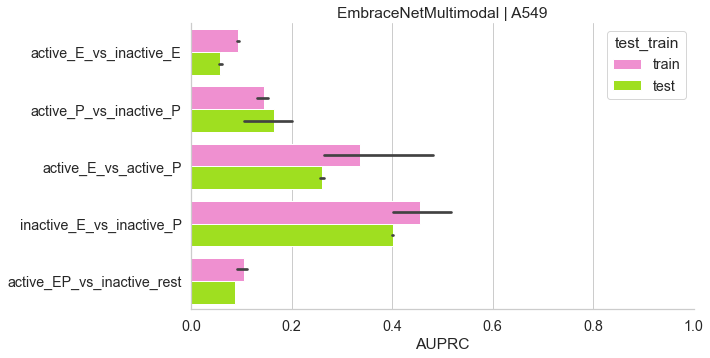

In [77]:
from BIOINF_tesi.models.utils import plot_scores
plot_scores(cells=cell_line, models=['EmbraceNetMultimodal'])

## not freezed layers + NO AUGMENTATION

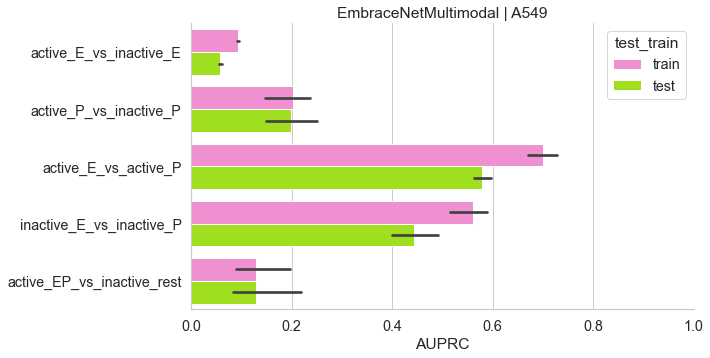

In [42]:
from BIOINF_tesi.models.utils import plot_scores
plot_scores(cells=cell_line, models=['EmbraceNetMultimodal'])

## not freezed layers + AUGMENTATION

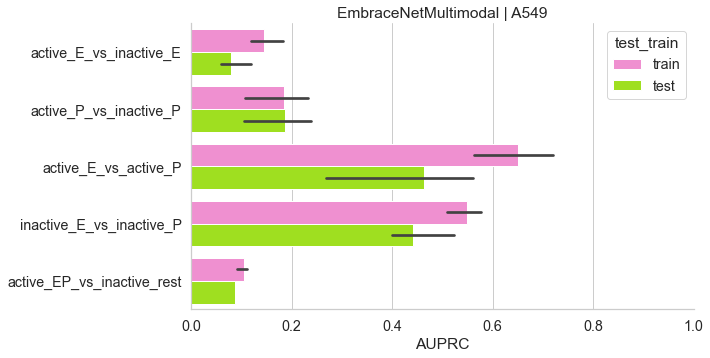

In [38]:
from BIOINF_tesi.models.utils import plot_scores
plot_scores(cells=cell_line, models=['EmbraceNetMultimodal'])

## unimodal

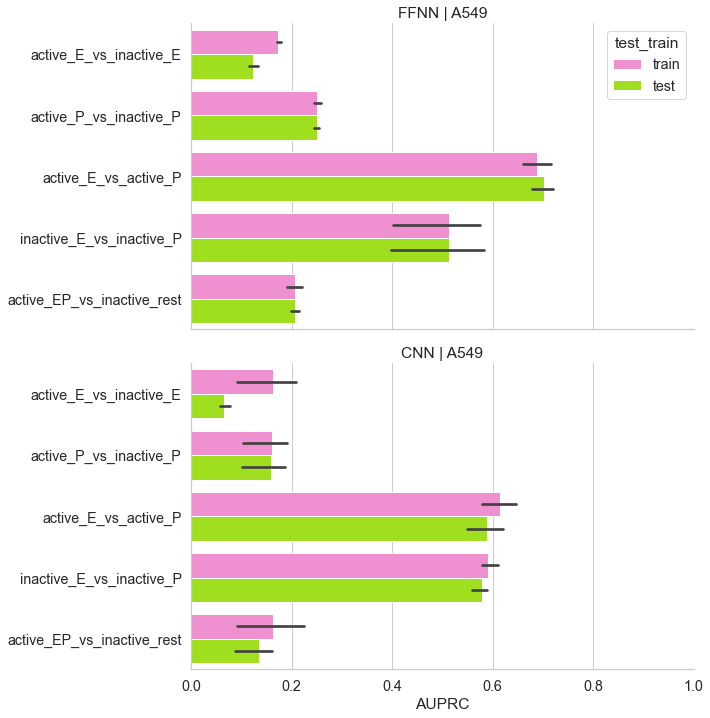

In [81]:
plot_scores(cells=cell_line, models=['CNN','FFNN'])